## Weather Data prediction for Babes Bolyai University of Cluj Napoca

In this project we want to predict the temperature of Cluj Napoca for 3 days ahead taking into consideration the temperature for the last week. The data was taken from the WeatherData API from 1'st of January 2008 Until 1'st of May 2023. The frequency of the data is by the hour. For the data training we took the following columns:

    'visibility': 'Vis(m)',
    'dew_point': 'Tdew(degC)',
    'feels_like': 'Tfeel(degC)',
    'temp_min': 'Tmin(degC)',
    'temp_max': 'Tmax(degC)',
    'pressure': 'p(mbar)',
    'humidity': 'h(%)',
    'wind_speed': 'ws(m/s)',
    'wind_deg': 'wd(deg)',
    'rain_1h': 'rain_1h(mm)',
    'rain_3h': 'rain_3h(mm)',
    'snow_1h': 'snow_1h(mm)',
    'snow_3h': 'snow_3h(mm)',
    'clouds_all': 'clouds(%)',

## Exploratory Data Analysis

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pandas as pd 
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
csv_path_1 = "UBB_weather_jan2008_may2023_cleaned.csv"
df = pd.read_csv(csv_path_1)
df

Date_time  T(degC)   Vis(m)  Tdew(degC)  Tfeel(degC)  \
0       01-01-2008 00:00:00    -9.46   4000.0      -10.40        -9.46   
1       01-01-2008 01:00:00    -9.39   4000.0      -10.33        -9.39   
2       01-01-2008 02:00:00    -9.39   4000.0      -10.33        -9.39   
3       01-01-2008 03:00:00    -9.55   4000.0      -10.49        -9.55   
4       01-01-2008 04:00:00    -9.55   4000.0      -10.37        -9.55   
...                     ...      ...      ...         ...          ...   
139386  05-01-2023 19:00:00    12.61  10000.0        4.57        11.44   
139387  05-01-2023 20:00:00    10.61  10000.0        5.58         9.58   
139388  05-01-2023 21:00:00    10.07  10000.0        6.04         9.12   
139389  05-01-2023 22:00:00     9.80  10000.0        6.70         9.80   
139390  05-01-2023 23:00:00     8.34  10000.0        5.27         8.34   

        Tmin(degC)  Tmax(degC)  p(mbar)  h(%)  ws(m/s)  wd(deg)  rain_1h(mm)  \
0           -11.37       -7.64     1024    92     1.00      110          0.0   
1           -11.50       -7.39     1024    92     1.00       50          0.0   
2           -11.68       -7.35     1023    92     1.00      140          0.0   
3           -11.74       -7.60     1023    92     1.00      230          0.0   
4           -11.48       -7.85     1023    93     1.00      290          0.0   
...            ...         ...      ...   ...      ...      ...          ...   
139386       12.04       13.42     1019    58     0.51        0          0.0   
139387        9.85       11.83     1019    71     1.03      230          0.0   
139388        8.59       11.83     1019    76     1.03      300          0.0   
139389        7.48       11.83     1020    81     0.51        0          0.0   
139390        6.70       10.70     1020    81     1.03       80          0.0   

        rain_3h(mm)  snow_1h(mm)  snow_3h(mm)  clouds(%)  
0               0.0          0.0          0.0        100  
1               0.0          0.0          0.0        100  
2               0.0          0.0          0.0        100  
3               0.0          0.0          0.1        100  
4               0.0          0.0          0.0        100  
...             ...          ...          ...        ...  
139386          0.0          0.0          0.0          0  
139387          0.0          0.0          0.0          0  
139388          0.0          0.0          0.0          0  
139389          0.0          0.0          0.0          0  
139390          0.0          0.0          0.0          0  

[139391 rows x 16 columns]

## Average temperature by month plot

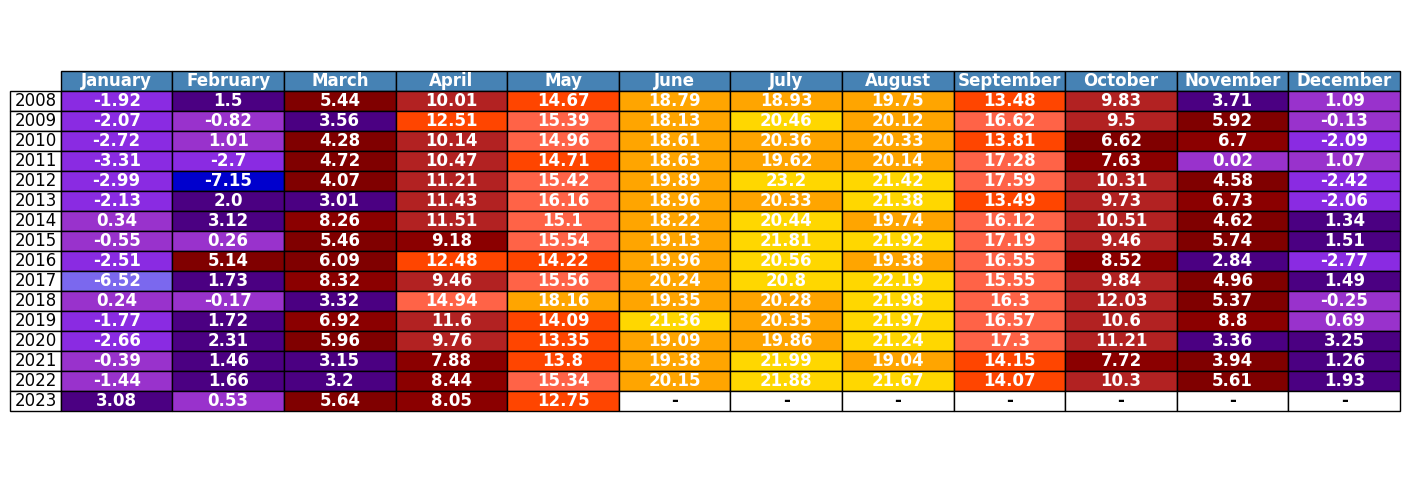

In [21]:


from calendar import month_name

df["Date_time"] = pd.to_datetime(df["Date_time"])
df["Month"] = df["Date_time"].dt.month
df["Year"] = df["Date_time"].dt.year
monthly_avg_temp = df.groupby(["Year", "Month"])["T(degC)"].mean().reset_index()
monthly_avg_temp_pivot = monthly_avg_temp.pivot(index="Year", columns="Month", values="T(degC)")
monthly_avg_temp_pivot = monthly_avg_temp_pivot.loc[:2023, :]

# Create the table figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis("off")  # Hide the axes

# Plot the table with improved layout and color
table = ax.table(cellText=np.where(np.isnan(monthly_avg_temp_pivot.values), "-", np.round(monthly_avg_temp_pivot.values, 2)),
                 colLabels=[month_name[i] for i in monthly_avg_temp_pivot.columns],
                 rowLabels=monthly_avg_temp_pivot.index.astype(str),
                 loc="center",
                 cellLoc="center",
                 colWidths=[0.1] * len(monthly_avg_temp_pivot.columns))

# Add colors to the cells
colors = ["#FFD700", "#FFA500", "#FF6347", "#FF4500", "#B22222", "#8B0000", "#800000", "#4B0082", "#9932CC", "#8A2BE2", "#7B68EE", "#0000CD"]
vmin, vmax = monthly_avg_temp_pivot.min().min(), monthly_avg_temp_pivot.max().max()
for i in range(len(monthly_avg_temp_pivot.index)):
    for j in range(len(monthly_avg_temp_pivot.columns)):
        cell = table.get_celld()[i + 1, j]
        value = monthly_avg_temp_pivot.iloc[i, j]
        if np.isnan(value):
            cell.set_text_props(weight="bold", color="black")  # Set the text style for NaN values
            cell.set_facecolor("white")  # Leave NaN cells blank
        else:
            normalized_value = 1 - (value - vmin) / (vmax - vmin)
            color_index = int(normalized_value * (len(colors) - 1))
            cell.set_text_props(weight="bold", color="white")  # Set the text style for non-NaN values
            cell.set_facecolor(colors[color_index])

# Add colors to the year cells
for i, cell in table.get_celld().items():
    if i[0] == 0:
        cell.set_text_props(weight="bold", color="white")  # Set the text style for year cells
        cell.set_facecolor("#4682B4")  # Set the color for year cells

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add a title
#ax.set_title("Monthly Average Temperature")

# Display the table figure
plt.show()

## Description of all parameters taken from the API

C:\Users\Legion\AppData\Local\Temp\ipykernel_27864\1062193177.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


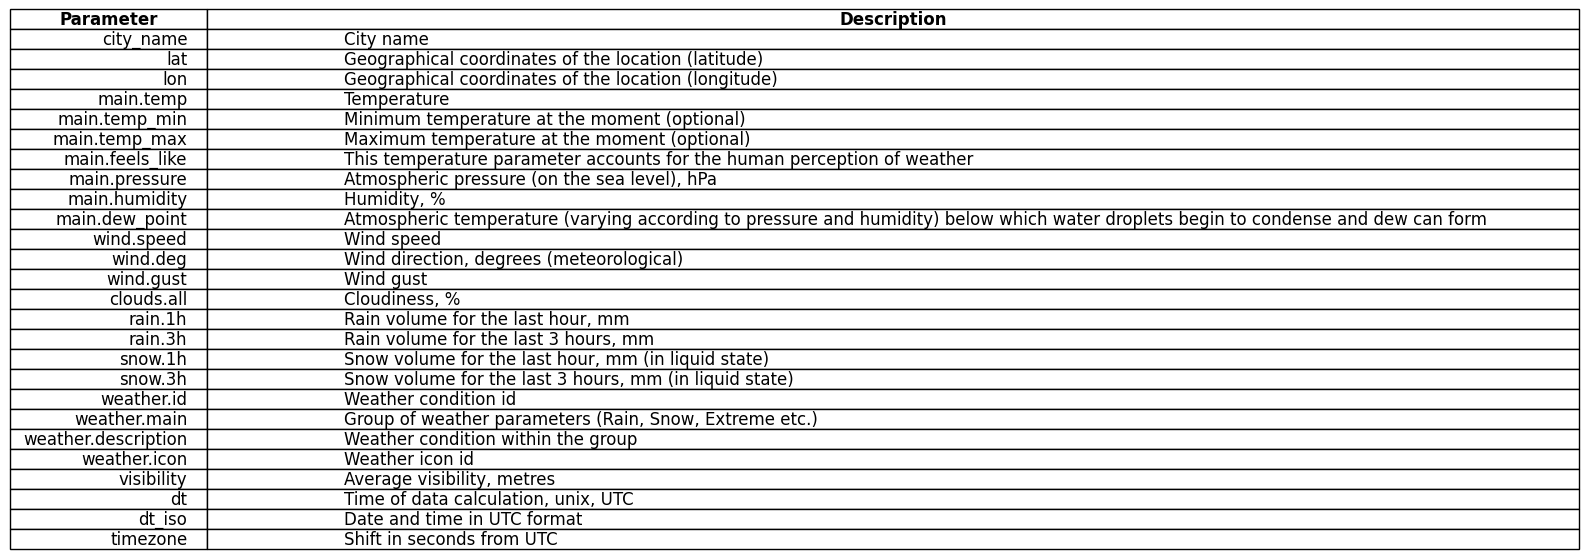

In [31]:
# Create a DataFrame to store the weather parameters
weather_params = pd.DataFrame({
    'Parameter': ['city_name', 'lat', 'lon', 'main.temp', 'main.temp_min', 'main.temp_max',
                  'main.feels_like', 'main.pressure', 'main.humidity', 'main.dew_point',
                  'wind.speed', 'wind.deg', 'wind.gust', 'clouds.all', 'rain.1h', 'rain.3h',
                  'snow.1h', 'snow.3h', 'weather.id', 'weather.main', 'weather.description',
                  'weather.icon', 'visibility', 'dt', 'dt_iso', 'timezone'],
    'Description': ['City name', 'Geographical coordinates of the location (latitude)',
                    'Geographical coordinates of the location (longitude)', 'Temperature',
                    'Minimum temperature at the moment (optional)',
                    'Maximum temperature at the moment (optional)',
                    'This temperature parameter accounts for the human perception of weather',
                    'Atmospheric pressure (on the sea level), hPa', 'Humidity, %',
                    'Atmospheric temperature (varying according to pressure and humidity) below which water droplets begin to condense and dew can form',
                    'Wind speed', 'Wind direction, degrees (meteorological)', 'Wind gust',
                    'Cloudiness, %', 'Rain volume for the last hour, mm',
                    'Rain volume for the last 3 hours, mm', 'Snow volume for the last hour, mm (in liquid state)',
                    'Snow volume for the last 3 hours, mm (in liquid state)', 'Weather condition id',
                    'Group of weather parameters (Rain, Snow, Extreme etc.)',
                    'Weather condition within the group', 'Weather icon id', 'Average visibility, metres',
                    'Time of data calculation, unix, UTC', 'Date and time in UTC format',
                    'Shift in seconds from UTC']
})

# Create a figure with a table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Hide the axis

# Create the table
table = ax.table(cellText=weather_params.values,
                 colLabels=weather_params.columns,
                 loc='center')

# Set the font size and cell padding of the table
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Adjust the cell heights to improve readability
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold')  # Bold style for column headers
    elif key[1] == 1:  # Align descriptions to the left
        cell.set_text_props(ha='left')

# Set the column widths
column_widths = [0.4, 0.6]  # Adjust the values as needed
for i, width in enumerate(column_widths):
    table.auto_set_column_width(col=i)

#plt.title('Weather Parameters')

plt.tight_layout()
plt.show()

## .describe() module of pandas turned into a plot

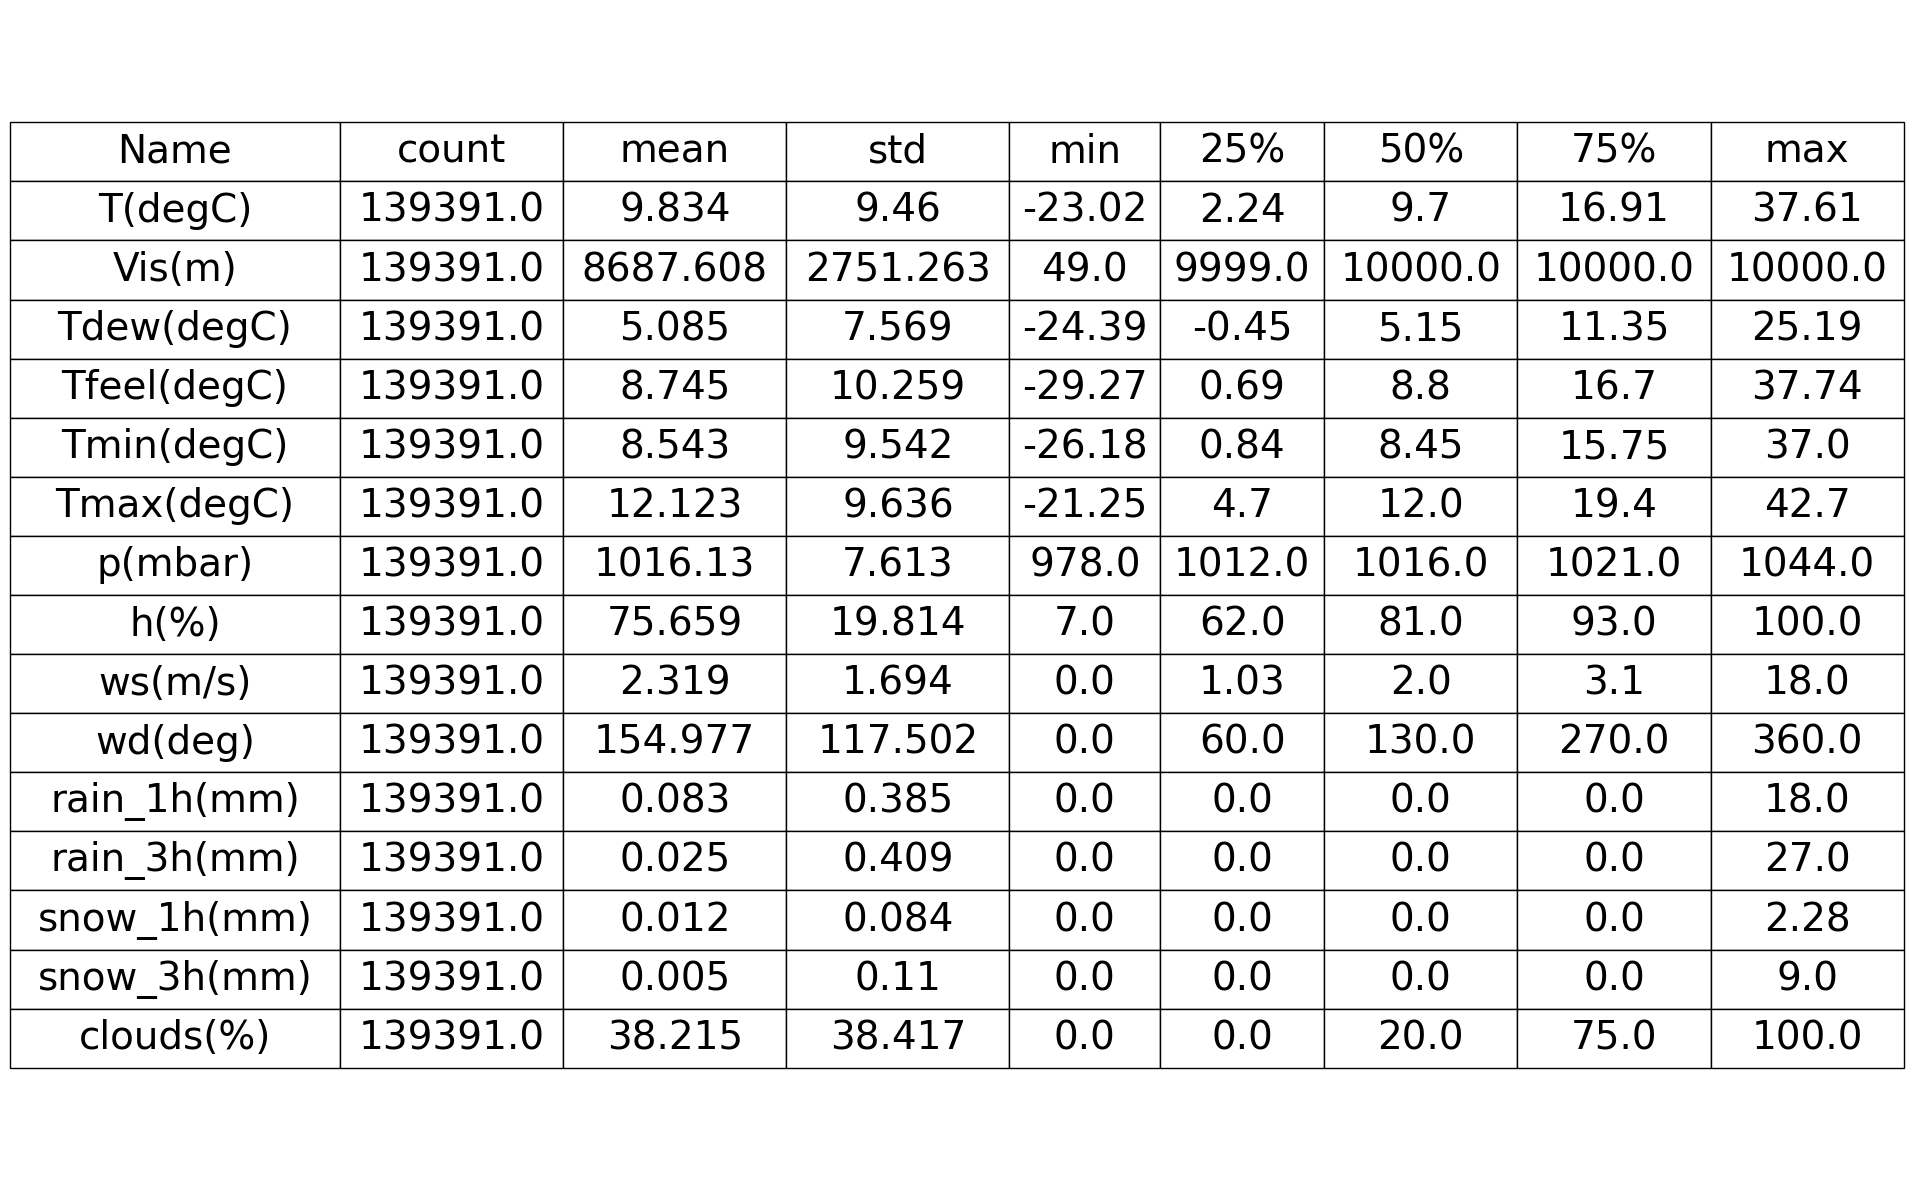

In [73]:

# Generate rounded summary statistics with column names
summary = df.describe().T.round(3)
summary_columns = ['Name', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
summary.insert(0, 'Name', summary.index)
summary.columns = summary_columns

# Create a table plot
fig, ax = plt.subplots(figsize=(16, 12))
ax.axis('off')  # Hide the axis

# Create the table
table = ax.table(cellText=summary.values,
                 colLabels=summary.columns,
                 cellLoc='center',
                 loc='center')

# Set the font size and cell padding of the table
table.set_fontsize(28)
table.scale(2.8, 2.8)

# Set the column widths
column_widths = [0.5] * len(summary.columns)  # Adjust the values as needed
for i, width in enumerate(column_widths):
    table.auto_set_column_width(col=i)

#plt.title('Summary Statistics')

plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('UBB_weather_jan2008_may2023.csv') # read the data which we received from the API 

In [2]:
df = df.rename(columns={'dt_iso': 'Date_time'})
df["Date_time"] = df["Date_time"].str.replace("UTC", '')
df['Date_time'] = df['Date_time'].str.strip()
df["Date_time"] = pd.to_datetime(df["Date_time"], format= '%Y-%m-%d %H:%M:%S %z', utc=True)
df['Date_time'] = df['Date_time'].dt.strftime('%m-%d-%Y %H:%M:%S')
df["Date_time"] # convert the date time to the correct format

0         01-01-2008 00:00:00
1         01-01-2008 01:00:00
2         01-01-2008 02:00:00
3         01-01-2008 03:00:00
4         01-01-2008 04:00:00
                 ...         
139389    05-01-2023 19:00:00
139390    05-01-2023 20:00:00
139391    05-01-2023 21:00:00
139392    05-01-2023 22:00:00
139393    05-01-2023 23:00:00
Name: Date_time, Length: 139394, dtype: object

In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))# make the device name visible to be sure we use GPU

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
df.drop(columns=["dt",  "timezone", "city_name", "lat", "lon", "weather_icon", "weather_main", "weather_description", "weather_id", "sea_level", "grnd_level", "wind_gust"], inplace=True)
df # drop the columns which we don't need

Date_time   temp  visibility  dew_point  feels_like  \
0       01-01-2008 00:00:00  -9.46      4000.0     -10.40       -9.46   
1       01-01-2008 01:00:00  -9.39      4000.0     -10.33       -9.39   
2       01-01-2008 02:00:00  -9.39      4000.0     -10.33       -9.39   
3       01-01-2008 03:00:00  -9.55      4000.0     -10.49       -9.55   
4       01-01-2008 04:00:00  -9.55      4000.0     -10.37       -9.55   
...                     ...    ...         ...        ...         ...   
139389  05-01-2023 19:00:00  12.61     10000.0       4.57       11.44   
139390  05-01-2023 20:00:00  10.61     10000.0       5.58        9.58   
139391  05-01-2023 21:00:00  10.07     10000.0       6.04        9.12   
139392  05-01-2023 22:00:00   9.80     10000.0       6.70        9.80   
139393  05-01-2023 23:00:00   8.34     10000.0       5.27        8.34   

        temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  rain_1h  \
0         -11.37     -7.64      1024        92        1.00       110      NaN   
1         -11.50     -7.39      1024        92        1.00        50      NaN   
2         -11.68     -7.35      1023        92        1.00       140      NaN   
3         -11.74     -7.60      1023        92        1.00       230      NaN   
4         -11.48     -7.85      1023        93        1.00       290      NaN   
...          ...       ...       ...       ...         ...       ...      ...   
139389     12.04     13.42      1019        58        0.51         0      NaN   
139390      9.85     11.83      1019        71        1.03       230      NaN   
139391      8.59     11.83      1019        76        1.03       300      NaN   
139392      7.48     11.83      1020        81        0.51         0      NaN   
139393      6.70     10.70      1020        81        1.03        80      NaN   

        rain_3h  snow_1h  snow_3h  clouds_all  
0           NaN      NaN      NaN         100  
1           NaN      NaN      NaN         100  
2           NaN      NaN      NaN         100  
3           NaN      NaN      0.1         100  
4           NaN      NaN      NaN         100  
...         ...      ...      ...         ...  
139389      NaN      NaN      NaN           0  
139390      NaN      NaN      NaN           0  
139391      NaN      NaN      NaN           0  
139392      NaN      NaN      NaN           0  
139393      NaN      NaN      NaN           0  

[139394 rows x 16 columns]

In [5]:
df.isnull().sum() # check if there are any missing values

Date_time      0
T(degC)        0
Vis(m)         0
Tdew(degC)     0
Tfeel(degC)    0
Tmin(degC)     0
Tmax(degC)     0
p(mbar)        0
h(%)           0
ws(m/s)        0
wd(deg)        0
rain_1h(mm)    0
rain_3h(mm)    0
snow_1h(mm)    0
snow_3h(mm)    0
clouds(%)      0
dtype: int64

In [75]:
new_col_names = {
    'temp': 'T(degC)',
    'visibility': 'Vis(m)',
    'dew_point': 'Tdew(degC)',
    'feels_like': 'Tfeel(degC)',
    'temp_min': 'Tmin(degC)',
    'temp_max': 'Tmax(degC)',
    'pressure': 'p(mbar)',
    'humidity': 'h(%)',
    'wind_speed': 'ws(m/s)',
    'wind_deg': 'wd(deg)',
    'rain_1h': 'rain_1h(mm)',
    'rain_3h': 'rain_3h(mm)',
    'snow_1h': 'snow_1h(mm)',
    'snow_3h': 'snow_3h(mm)',
    'clouds_all': 'clouds(%)',
    
}
df = df.rename(columns=new_col_names) # rename the columns to be more readable
df

Date_time  T(degC)   Vis(m)  Tdew(degC)  Tfeel(degC)  \
0       01-01-2008 00:00:00    -9.46   4000.0      -10.40        -9.46   
1       01-01-2008 01:00:00    -9.39   4000.0      -10.33        -9.39   
2       01-01-2008 02:00:00    -9.39   4000.0      -10.33        -9.39   
3       01-01-2008 03:00:00    -9.55   4000.0      -10.49        -9.55   
4       01-01-2008 04:00:00    -9.55   4000.0      -10.37        -9.55   
...                     ...      ...      ...         ...          ...   
139386  05-01-2023 19:00:00    12.61  10000.0        4.57        11.44   
139387  05-01-2023 20:00:00    10.61  10000.0        5.58         9.58   
139388  05-01-2023 21:00:00    10.07  10000.0        6.04         9.12   
139389  05-01-2023 22:00:00     9.80  10000.0        6.70         9.80   
139390  05-01-2023 23:00:00     8.34  10000.0        5.27         8.34   

        Tmin(degC)  Tmax(degC)  p(mbar)  h(%)  ws(m/s)  wd(deg)  rain_1h(mm)  \
0           -11.37       -7.64     1024    92     1.00      110          0.0   
1           -11.50       -7.39     1024    92     1.00       50          0.0   
2           -11.68       -7.35     1023    92     1.00      140          0.0   
3           -11.74       -7.60     1023    92     1.00      230          0.0   
4           -11.48       -7.85     1023    93     1.00      290          0.0   
...            ...         ...      ...   ...      ...      ...          ...   
139386       12.04       13.42     1019    58     0.51        0          0.0   
139387        9.85       11.83     1019    71     1.03      230          0.0   
139388        8.59       11.83     1019    76     1.03      300          0.0   
139389        7.48       11.83     1020    81     0.51        0          0.0   
139390        6.70       10.70     1020    81     1.03       80          0.0   

        rain_3h(mm)  snow_1h(mm)  snow_3h(mm)  clouds(%)  
0               0.0          0.0          0.0        100  
1               0.0          0.0          0.0        100  
2               0.0          0.0          0.0        100  
3               0.0          0.0          0.1        100  
4               0.0          0.0          0.0        100  
...             ...          ...          ...        ...  
139386          0.0          0.0          0.0          0  
139387          0.0          0.0          0.0          0  
139388          0.0          0.0          0.0          0  
139389          0.0          0.0          0.0          0  
139390          0.0          0.0          0.0          0  

[139391 rows x 16 columns]

In [6]:
df = df[df['T(degC)'] >= -30] # remove the outliers
df.reset_index(drop=True, inplace=True)
df

Date_time  T(degC)   Vis(m)  Tdew(degC)  Tfeel(degC)  \
0       01-01-2008 00:00:00    -9.46   4000.0      -10.40        -9.46   
1       01-01-2008 01:00:00    -9.39   4000.0      -10.33        -9.39   
2       01-01-2008 02:00:00    -9.39   4000.0      -10.33        -9.39   
3       01-01-2008 03:00:00    -9.55   4000.0      -10.49        -9.55   
4       01-01-2008 04:00:00    -9.55   4000.0      -10.37        -9.55   
...                     ...      ...      ...         ...          ...   
139386  05-01-2023 19:00:00    12.61  10000.0        4.57        11.44   
139387  05-01-2023 20:00:00    10.61  10000.0        5.58         9.58   
139388  05-01-2023 21:00:00    10.07  10000.0        6.04         9.12   
139389  05-01-2023 22:00:00     9.80  10000.0        6.70         9.80   
139390  05-01-2023 23:00:00     8.34  10000.0        5.27         8.34   

        Tmin(degC)  Tmax(degC)  p(mbar)  h(%)  ws(m/s)  wd(deg)  rain_1h(mm)  \
0           -11.37       -7.64     1024    92     1.00      110          0.0   
1           -11.50       -7.39     1024    92     1.00       50          0.0   
2           -11.68       -7.35     1023    92     1.00      140          0.0   
3           -11.74       -7.60     1023    92     1.00      230          0.0   
4           -11.48       -7.85     1023    93     1.00      290          0.0   
...            ...         ...      ...   ...      ...      ...          ...   
139386       12.04       13.42     1019    58     0.51        0          0.0   
139387        9.85       11.83     1019    71     1.03      230          0.0   
139388        8.59       11.83     1019    76     1.03      300          0.0   
139389        7.48       11.83     1020    81     0.51        0          0.0   
139390        6.70       10.70     1020    81     1.03       80          0.0   

        rain_3h(mm)  snow_1h(mm)  snow_3h(mm)  clouds(%)  
0               0.0          0.0          0.0        100  
1               0.0          0.0          0.0        100  
2               0.0          0.0          0.0        100  
3               0.0          0.0          0.1        100  
4               0.0          0.0          0.0        100  
...             ...          ...          ...        ...  
139386          0.0          0.0          0.0          0  
139387          0.0          0.0          0.0          0  
139388          0.0          0.0          0.0          0  
139389          0.0          0.0          0.0          0  
139390          0.0          0.0          0.0          0  

[139391 rows x 16 columns]

In [76]:
titles = [
    "Temperature",
    "Visibility",
    "Temperature (dew point)",
    "Temperature (feels like)",
    "Temperature (min)",
    "Temperature (max)",
    "Pressure",
    "Humidity",
    "Wind speed",
    "Wind direction in degrees",
    "Rain volume for the last 1 hour",
    "Rain volume for the last 3 hours",
    "Snow volume for the last 1 hour",
    "Snow volume for the last 3 hours",
    "Cloudiness"
]

feature_keys = [
    "T(degC)",
    "Vis(m)",
    "Tdew(degC)",
    "Tfeel(degC)",
    "Tmin(degC)",
    "Tmax(degC)",
    "p(mbar)",
    "h(%)",
    "ws(m/s)",
    "wd(deg)",
    "rain_1h(mm)",
    "rain_3h(mm)",
    "snow_1h(mm)",
    "snow_3h(mm)",
    "clouds(%)"
    
]

colors = [
    "teal",
    "orange",
    "green",
    "red",
    "purple",
    "skyblue",
    "pink",
    "gray",
    "darkred",
    "k",
]

date_time_key = "Date_time"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=8, ncols=2, figsize=(32, 50), dpi=400, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()
    plt.show() 


In [12]:
show_raw_visualization(df) # show the raw data for each feature

Text(0.5, 1.0, 'Heatmap of all the Features')

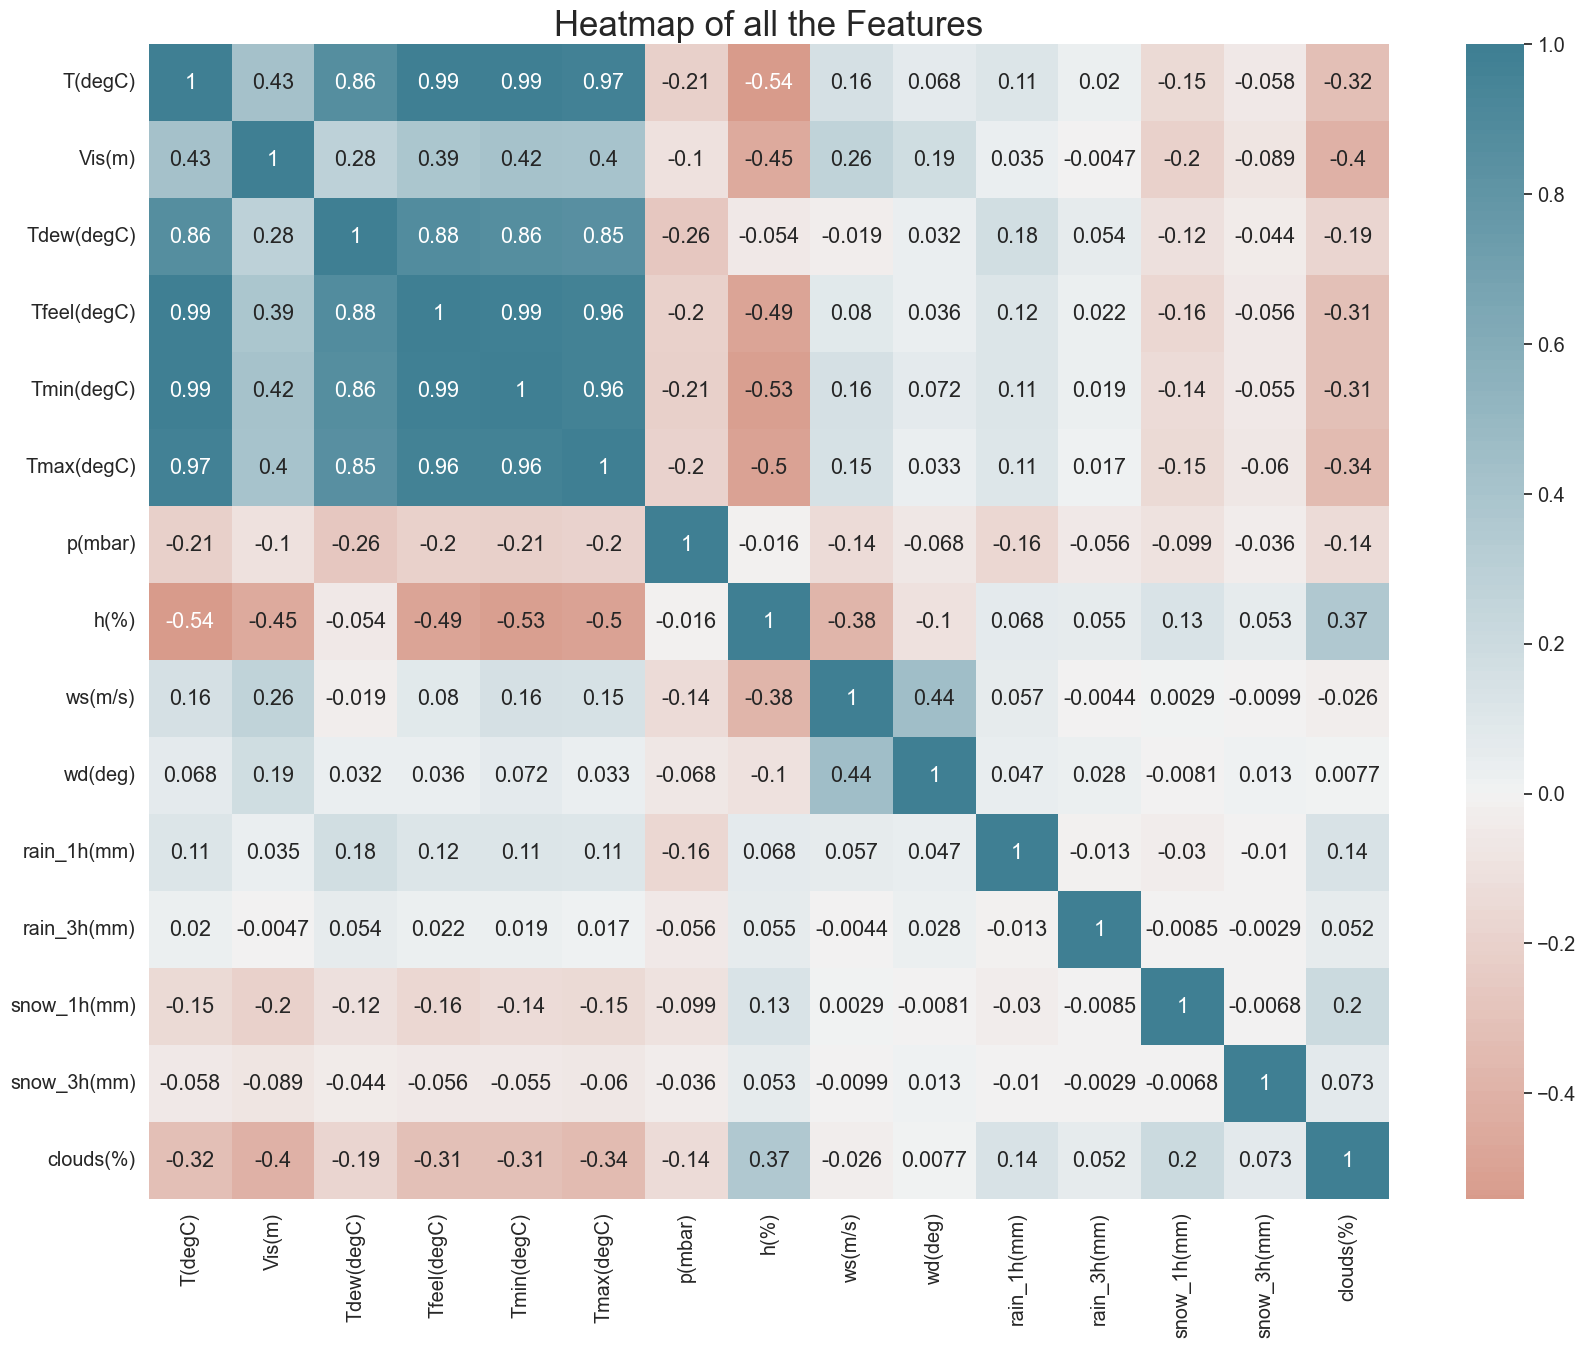

In [9]:
import matplotlib.style as style
style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.3)
plt.subplots(figsize = (20,15))
sns.heatmap(df.iloc[:, 1:].corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center=0)
plt.title("Heatmap of all the Features", fontsize = 25) # show the correlation between the features

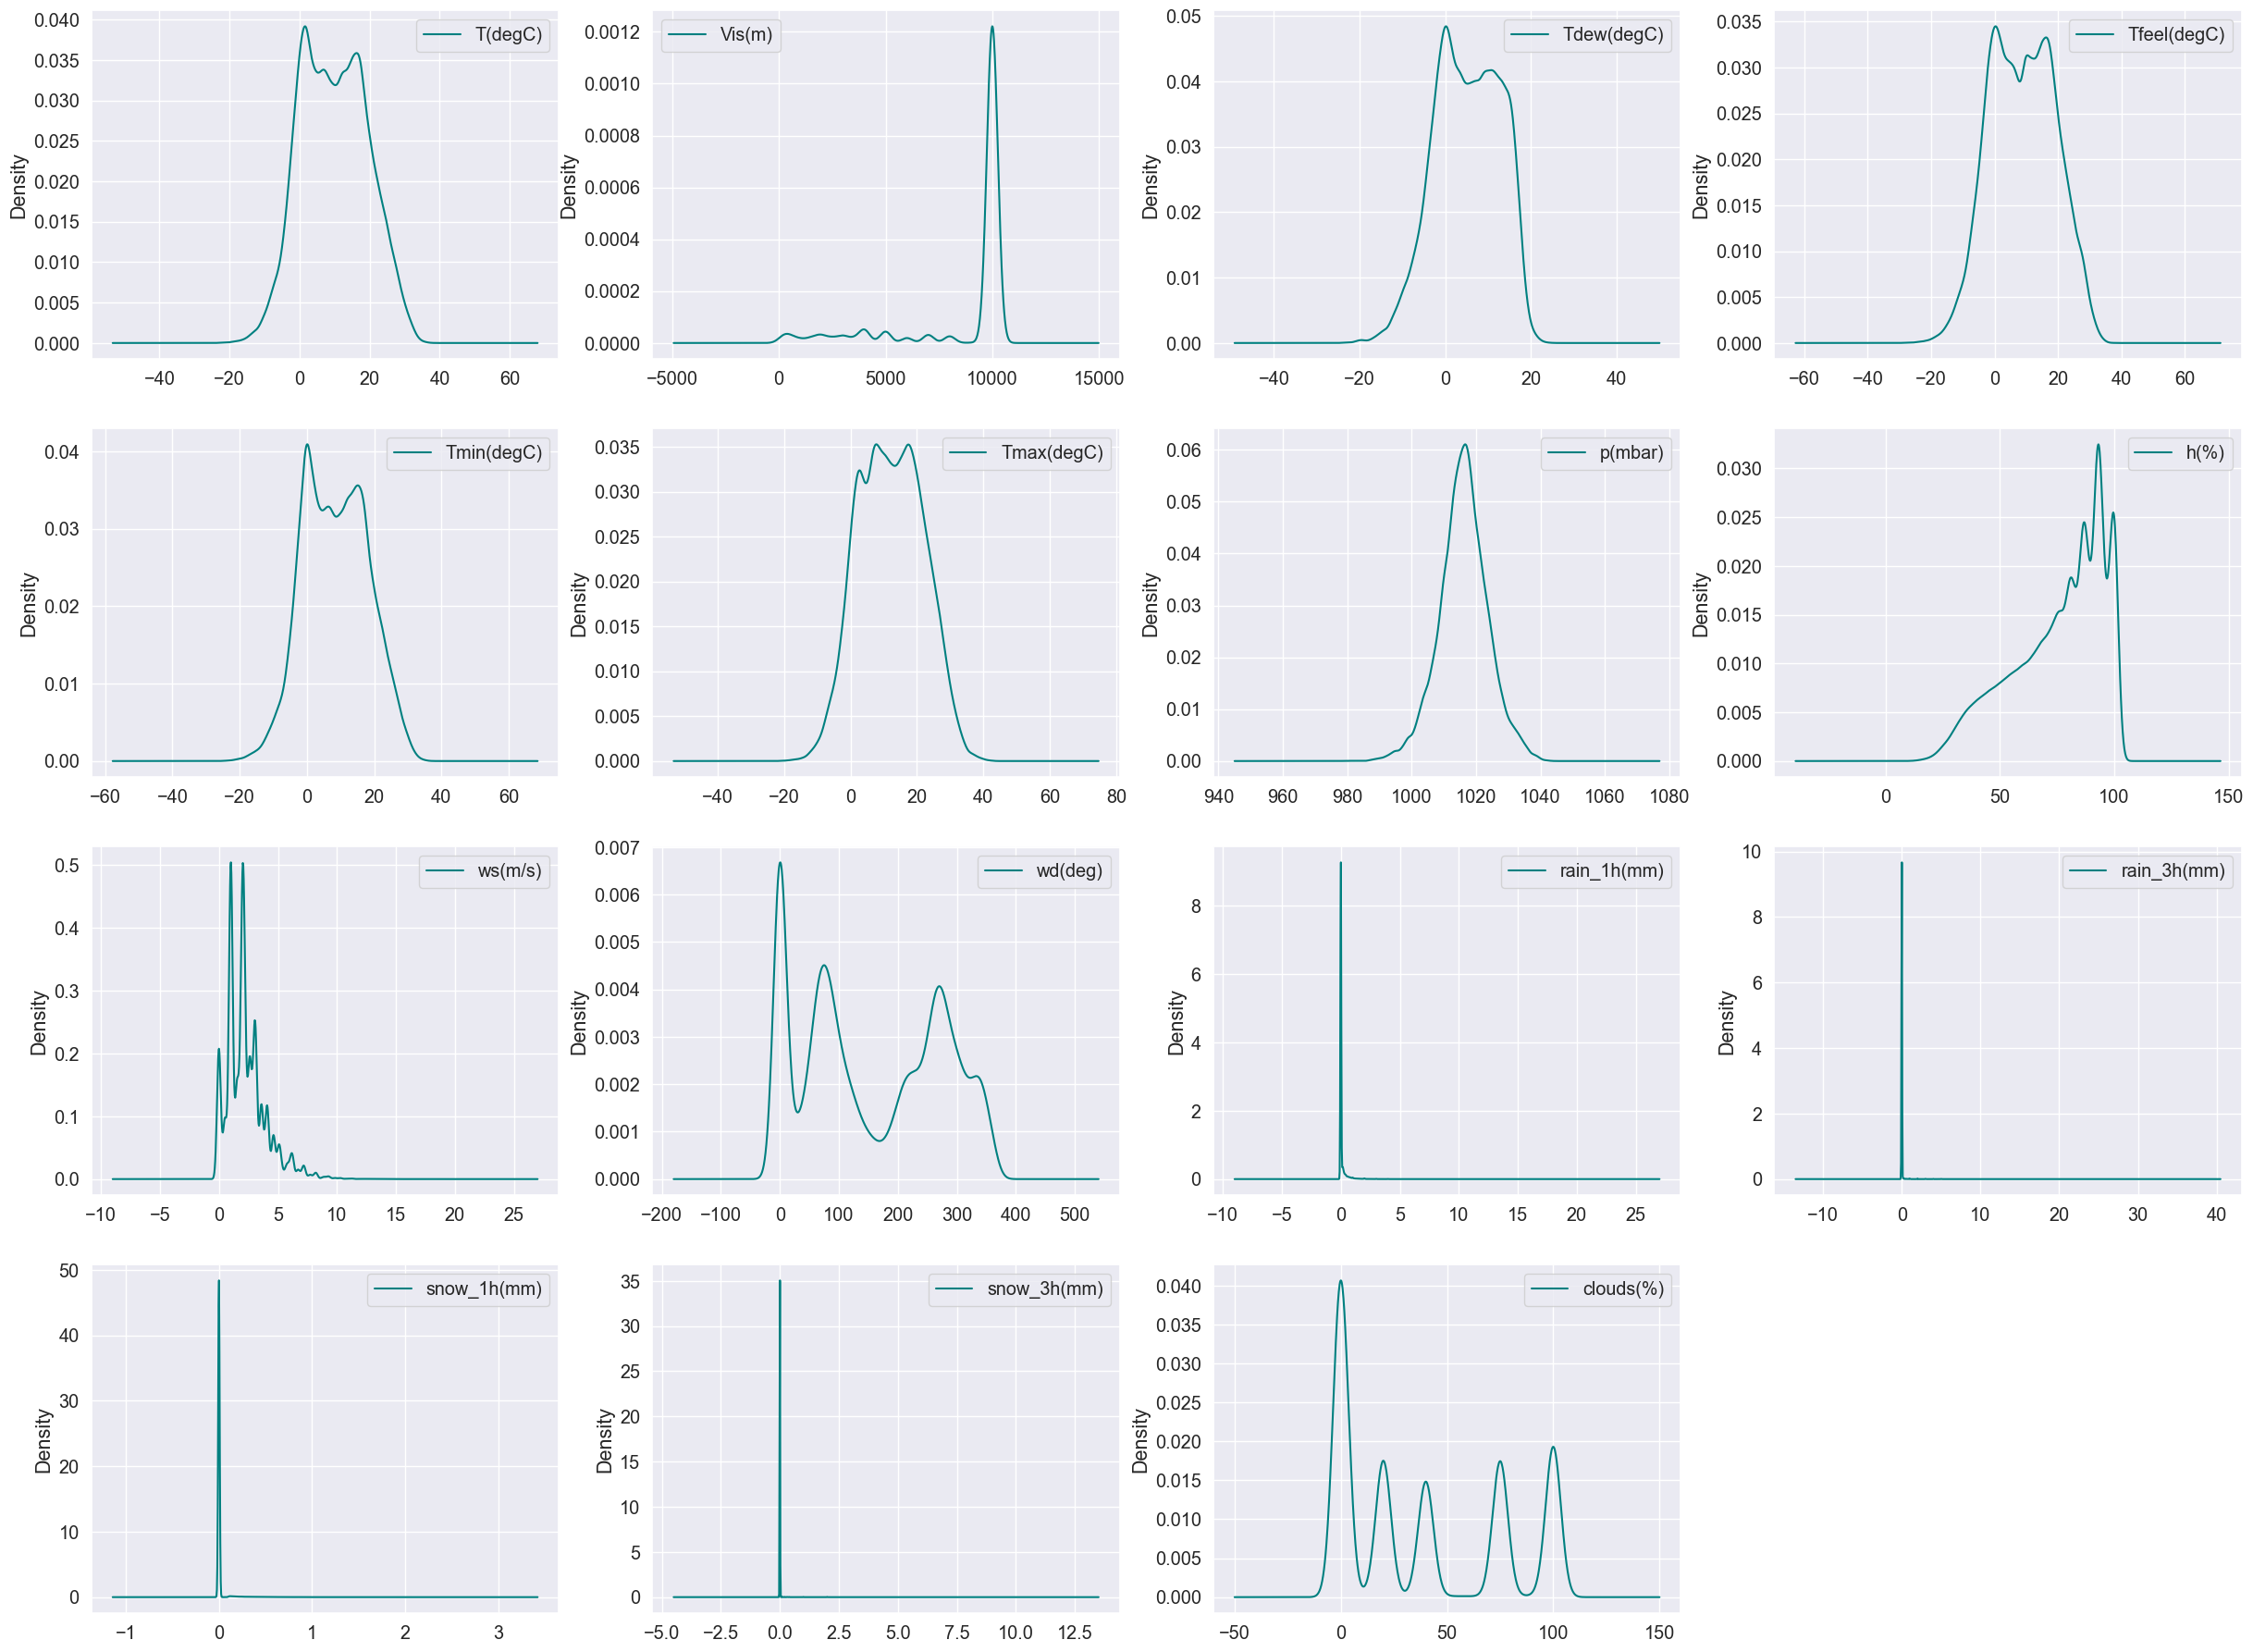

In [15]:
df.plot(kind='density', subplots=True, layout=(4,4), figsize=(30, 22.5), sharex=False, color='teal')
plt.show() # show the density plots for each feature

## LSTM training

In [99]:
# Define the split fraction for training and testing data
split_fraction = 0.867 #spit the data into 13 years of training and 2 years of testing

# Define the number of past hours of data to be used for predicting the future
past = 120 #the past 120 hours of data will be used to predict the future 12 hours of data

# Define the number of future hours to be predicted
future = 12

# Define the learning rate for the model
learning_rate = 1e-3

# Define the batch size for training the model
batch_size = 256 #the batch size is 256

# Define the number of hidden units for the LSTM layer
hidden_units = 32 #the number of hidden units is 32

# Define the number of epochs for training the model
epochs = 250

# Define the step size for sampling the data
step = 1 #step is 1 means that the data is sampled every hour

# Define the target column for prediction
target_column = 'T(degC)'

# Define the index of the target column
target_column_index = 0

# Calculate the index for splitting the data into training and validation sets
train_split = int(split_fraction * int(df.shape[0]))

# Define the selected features for training the model
selected_features = [feature_keys[i] for i in (1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14)]

# Define a function to normalize the data
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std #normalize the data

# Select the features for training and validation sets
features = df[selected_features]
features.index = df[date_time_key]

# Normalize the features data
features = normalize(features.values, train_split)
features = pd.DataFrame(features, columns=selected_features)
features[target_column] = df[target_column]

# Split the data into training and validation sets
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

# Define the start and end indices for the training data
start = past + future
end = start + train_split

# Define the sequence length for the LSTM layer
sequence_length = int(past/step)

# Define the end index for the validation data
x_end = len(val_data) - past - future

# Define the start index for the labels in the training data
label_start = train_split + past + future

# Select the features and labels for the training and validation sets
x_train = train_data[selected_features].values
x_val = val_data[selected_features].values
y_train = features.iloc[start:end][[target_column]]
y_val = features.iloc[label_start:][[target_column]]

In [102]:
dataset_train = keras.utils.timeseries_dataset_from_array(
    data=x_train,
    targets=y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
    shuffle=True,
) # create the training dataset

dataset_val = keras.utils.timeseries_dataset_from_array(
    data=x_val,
    targets=y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
) # create the validation dataset


This code defines an LSTM model using the Keras API. The model takes in inputs of shape `(sequence_length, len(selected_features))`, where `sequence_length` is the length of the input sequence and `len(selected_features)` is the number of features selected for training the model. The input is passed through a dropout layer with a dropout rate of 0.1, followed by an LSTM layer with `hidden_units` number of units. The output of the LSTM layer is passed through a dense layer with a single output unit. 

The model is compiled with the Adam optimizer, mean squared error loss, and mean absolute error and mean squared error metrics. The code then defines two callbacks: `es_callback` for early stopping based on the validation loss, and `modelckpt_callback` for saving the weights of the best model based on the validation loss. 

The model is trained using the `fit` method with the training and validation datasets, the defined callbacks, and the specified number of epochs. The training history is stored in the `history` variable.

In [103]:
from keras import regularizers
from keras import metrics

# Define the input layer with shape (sequence_length, len(selected_features))
inputs = keras.layers.Input(shape=(sequence_length, len(selected_features)))

# Add a dropout layer with a dropout rate of 0.1
dropout = keras.layers.Dropout(0.1)(inputs) 

# Add an LSTM layer with hidden_units number of units
lstm_out = keras.layers.LSTM(hidden_units, )(dropout)

# Add a dense layer with a single output unit
outputs = keras.layers.Dense(1)(lstm_out)

# Define the model with the input and output layers
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model with the Adam optimizer, mean squared error loss, and mean absolute error and mean squared error metrics
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse", metrics = [metrics.mean_absolute_error, 
                                                     metrics.mean_squared_error, 
                                                     ])

# Define the callbacks for early stopping and model checkpointing
path_checkpoint = "model_checkpoint_12_hours_32.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=10)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

# Train the model with the training and validation datasets, the defined callbacks, and the specified number of epochs
history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/250
433/436 [============================>.] - ETA: 0s - loss: 0.1412 - mean_absolute_error: 0.2753 - mean_squared_error: 0.1412
Epoch 1: val_loss improved from inf to 0.09888, saving model to model_checkpoint_1days_normalized_32.h5
436/436 [==============================] - 10s 19ms/step - loss: 0.1410 - mean_absolute_error: 0.2750 - mean_squared_error: 0.1410 - val_loss: 0.0989 - val_mean_absolute_error: 0.2439 - val_mean_squared_error: 0.0989
Epoch 2/250
433/436 [============================>.] - ETA: 0s - loss: 0.0764 - mean_absolute_error: 0.2141 - mean_squared_error: 0.0764
Epoch 2: val_loss improved from 0.09888 to 0.09250, saving model to model_checkpoint_1days_normalized_32.h5
436/436 [==============================] - 8s 18ms/step - loss: 0.0764 - mean_absolute_error: 0.2141 - mean_squared_error: 0.0764 - val_loss: 0.0925 - val_mean_absolute_error: 0.2354 - val_mean_squared_error: 0.0925
Epoch 3/250
435/436 [============================>.] - ETA: 0s - loss: 0.0699 - m

72/72 [==============================] - 2s 21ms/step


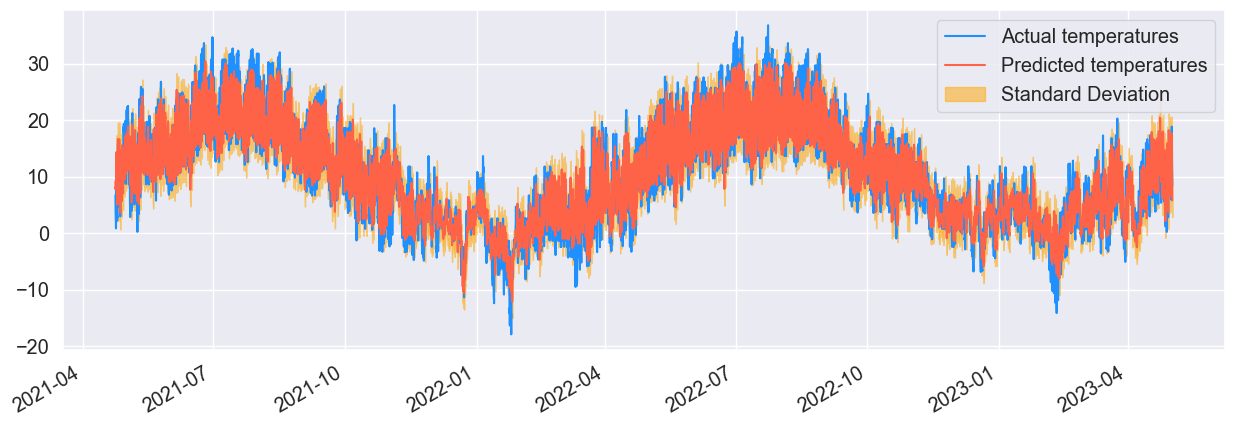

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions
predictions = model.predict(dataset_val)

# Assume y_val to be your validation target temperatures and reshape it to match the shape of predictions
y_val_reshaped = np.array(y_val).reshape(predictions.shape)

# Calculate the differences
differences = y_val_reshaped - predictions
std_dev = np.std(differences)

# Plot the temperatures and predictions
plt.figure(figsize=(15, 5))

# Plotting actual temperatures
plt.plot(dataset_val, y_val_reshaped, color='dodgerblue', label='Actual temperatures')
# Plotting predicted temperatures
plt.plot(dataset_val, predictions, color='tomato', label='Predicted temperatures')

# Plotting standard deviation
upper_bound = predictions + std_dev
lower_bound = predictions - std_dev
plt.fill_between(dataset_val, lower_bound.flatten(), upper_bound.flatten(), color='orange', alpha=.5,
                 label='Standard Deviation')

# Formatting dates for better display
plt.gcf().autofmt_xdate()

plt.legend()
plt.show()


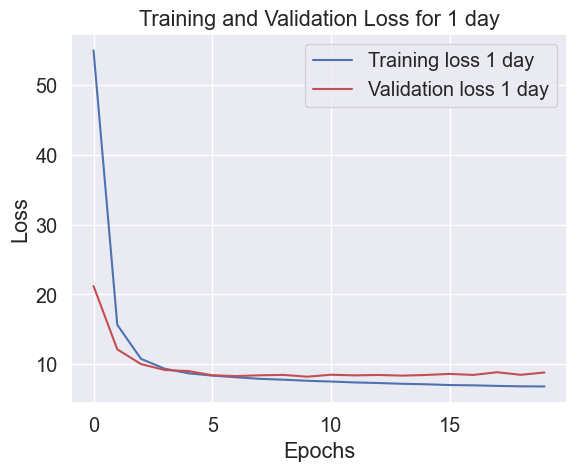

In [162]:
def visualize_loss(history, title):
    """
    Plots the training and validation loss over epochs.

    Args:
        history: A Keras history object containing the training and validation loss history.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    # Extract the training and validation loss from the history object
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Define the epochs for the plot
    epochs = range(len(loss))
    
    # Plot the training and validation loss over epochs
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss 1 day")
    plt.plot(epochs, val_loss, "r", label="Validation loss 1 day")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return


visualize_loss(history, "Training and Validation Loss for 1 day")


8/8 [==============================] - 0s 9ms/step


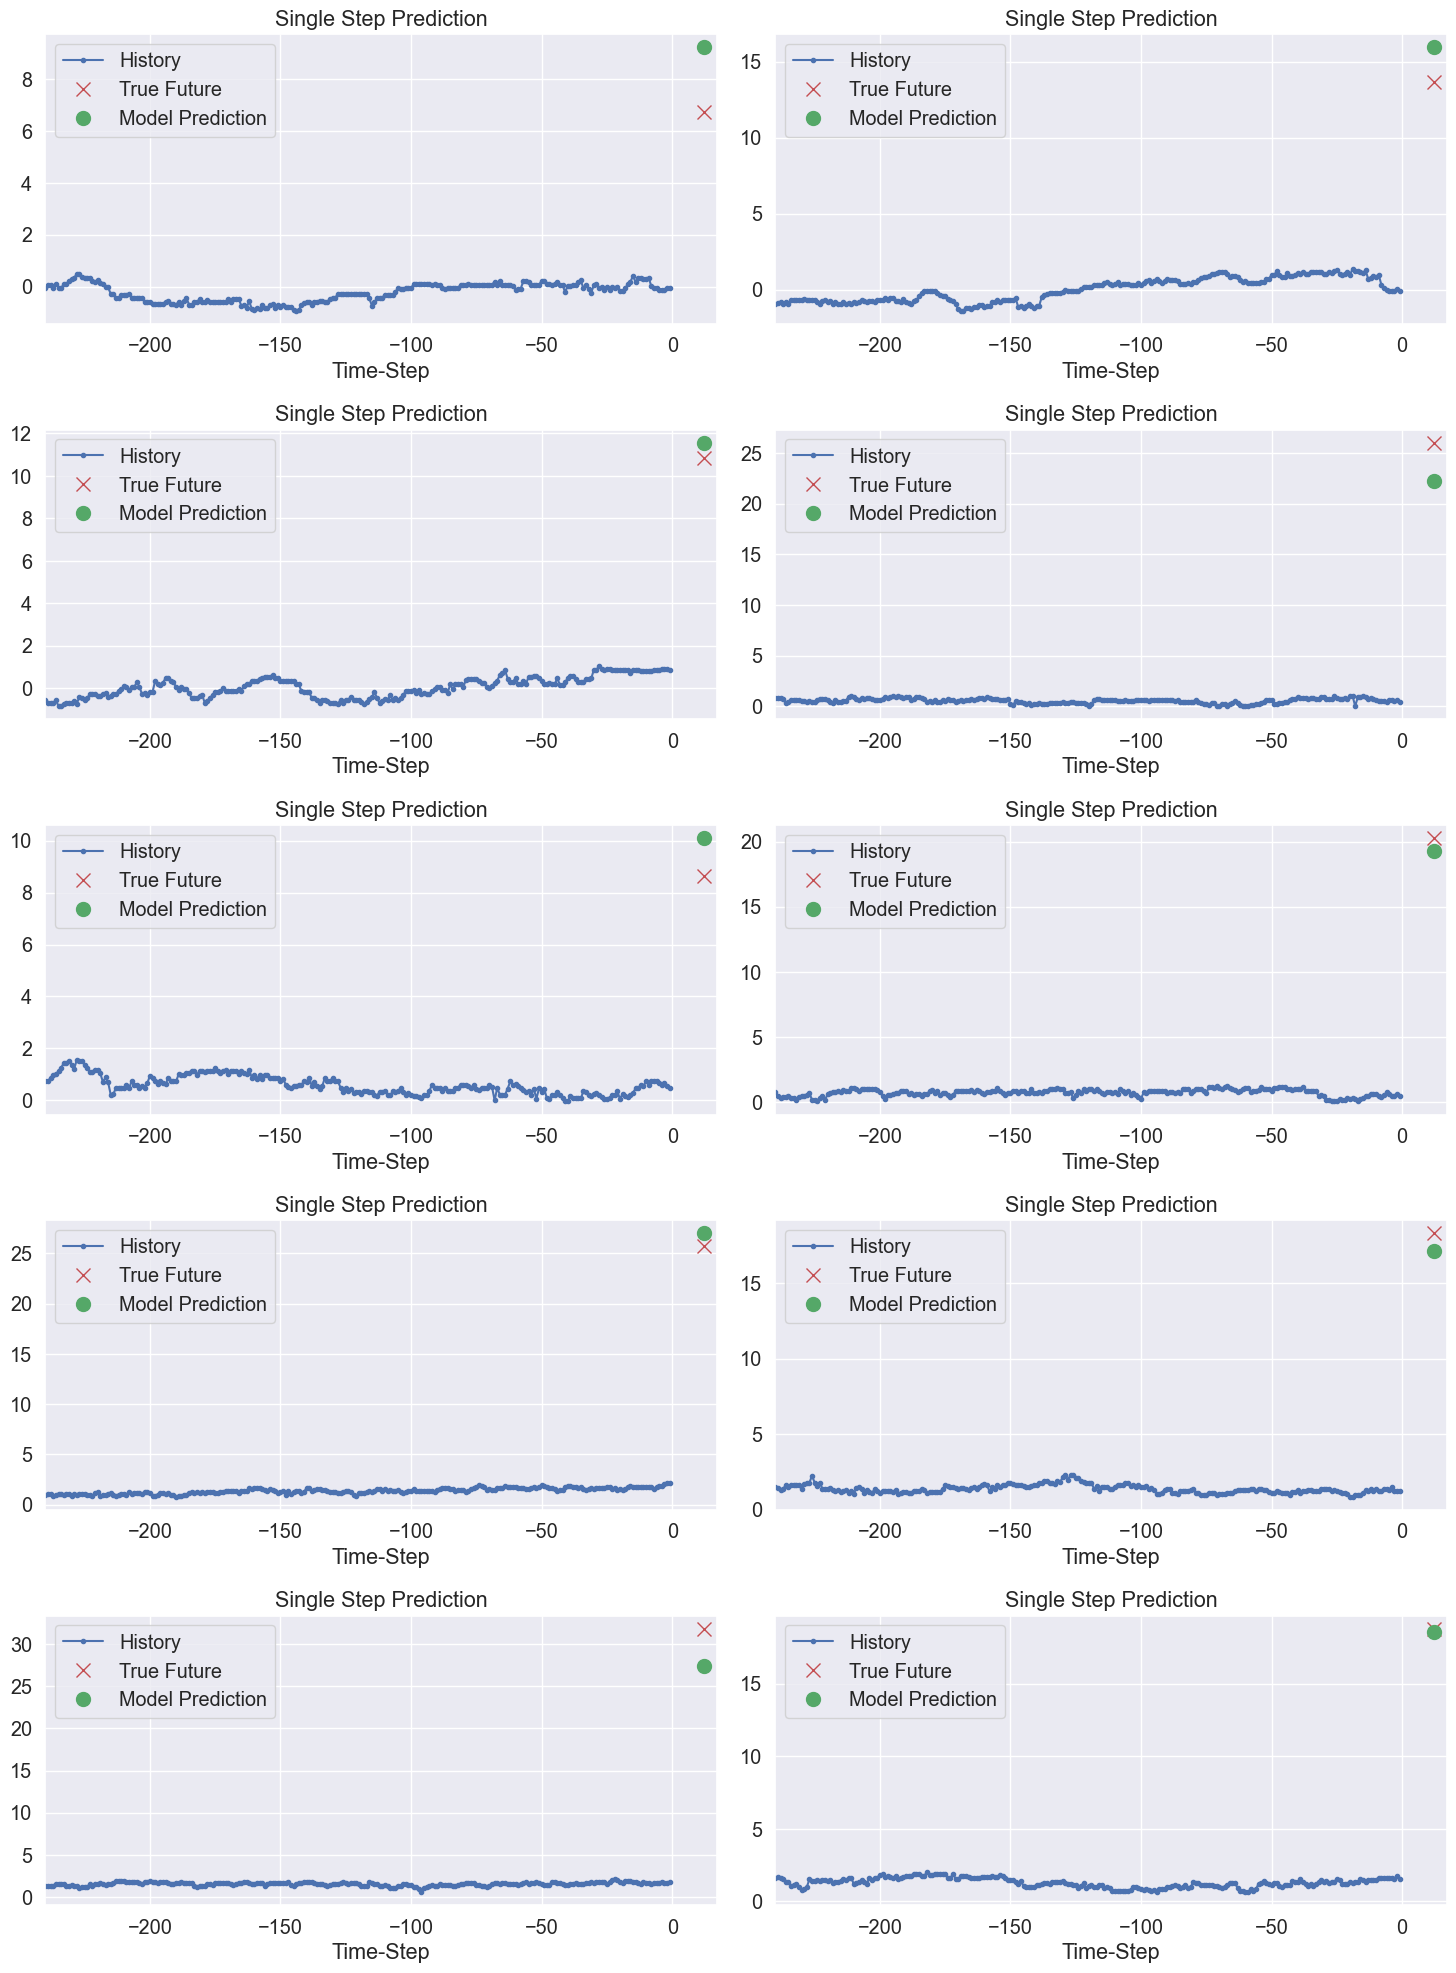

In [163]:
fig, axs = plt.subplots(5, 2, figsize=(15, 20)) # Creates 10 single step prediction subplots.

def show_plot(ax, plot_data, delta, title):
    """
    Plots the history, true future, and model prediction for a single time step prediction.

    Args:
        ax: A matplotlib axis object to plot the data on.
        plot_data: A list of three arrays containing the history, true future, and model prediction data.
        delta: An integer representing the number of time steps into the future to plot the true future and model prediction.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    # Define the labels and markers for the plot
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    
    # Define the time steps for the plot
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    
    # Define the future time step for the plot
    if delta:
        future = delta
    else:
        future = 0
    
    # Plot the data for each label and marker
    ax.set_title(title)
    for i, val in enumerate(plot_data):
        if i:
            ax.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            ax.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    
    # Add the legend and axis labels to the plot
    ax.legend()
    ax.set_xlim([time_steps[0], (future + 5)])
    ax.set_xlabel("Time-Step")
    return

for i, (x, y) in enumerate(dataset_val.take(10)):
    row = i // 2  # Row index
    col = i % 2  # Column index
    show_plot(
        axs[row, col],
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )

plt.tight_layout()
plt.show()
